<a href="https://colab.research.google.com/github/skm08/ANN/blob/main/HuggingFace_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import & setup

In [20]:
pip install transformers torch torchvision pillow

In [ ]:
import torch
from transformers import pipeline
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from diffusers import StableDiffusionPipeline, AutoPipelineForText2Image

In [18]:
from huggingface_hub import notebook_login

notebook_login()

# Natural Language Processing (NLP)

## Text Generation

In [2]:
from transformers import pipeline

pipe = pipeline("text-generation", model="openai-community/gpt2")

pipe("Tell me an interesting thing about AI")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Tell me an interesting thing about AI-driven programming. Do you see that in the future? I'm hoping it'll change things. I see it changing a lot. I think people probably should just let us do it for them. The problem,"}]

## Question Answering

In [3]:
from transformers import pipeline

qa_bot = pipeline('question-answering')
text = """
The Colosseum in Rome, Italy, is an iconic symbol of the Roman Empire, built between AD 70-80 to host gladiatorial contests and public spectacles, making it one of the world's most famous landmarks. Machu Picchu, hidden in Peru's Andes Mountains, is an ancient Incan citadel from the 15th century, renowned for its dry-stone walls and mysterious abandonment, rediscovered in 1911. The Great Wall of China stretches over 13,170 miles, constructed over centuries to protect against northern invasions with significant contributions from the Ming Dynasty. The Pyramids of Giza in Egypt, including the Great Pyramid of Khufu, are the only remaining wonders of the ancient world, built around 2560 B.C. as tombs for Pharaohs, showcasing ancient Egyptian architecture and beliefs in the afterlife. Angkor Wat in Cambodia is the world's largest religious monument, constructed in the 12th century initially for Hindu god Vishnu but later transformed into a Buddhist temple, highlighting the Khmer Empire's grandeur. Stonehenge in England, dating back to 3000-2000 BC, consists of a circular arrangement of large standing stones, possibly used as a ceremonial site or astronomical observatory, its purpose still debated among historians, adding to its mystery and allure.
"""

question = "Tell me about a historical place?"

result = qa_bot(question=question,context=text)
result

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Device set to use cuda:0


{'score': 0.2422851175069809,
 'start': 554,
 'end': 583,
 'answer': 'The Pyramids of Giza in Egypt'}

## Translations

In [4]:
from transformers import pipeline
translate = pipeline('translation_en_to_fr')
result = translate("What's up?")
result

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cuda:0


[{'translation_text': "Qu'en est-il?"}]

# Computer Vision (CV)

## Image Classification

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


Label: Lhasa, Lhasa apso, Confidence: 0.4469
Label: Tibetan terrier, chrysanthemum dog, Confidence: 0.3829
Label: Maltese dog, Maltese terrier, Maltese, Confidence: 0.0278
Label: golden retriever, Confidence: 0.0141
Label: otterhound, otter hound, Confidence: 0.0141


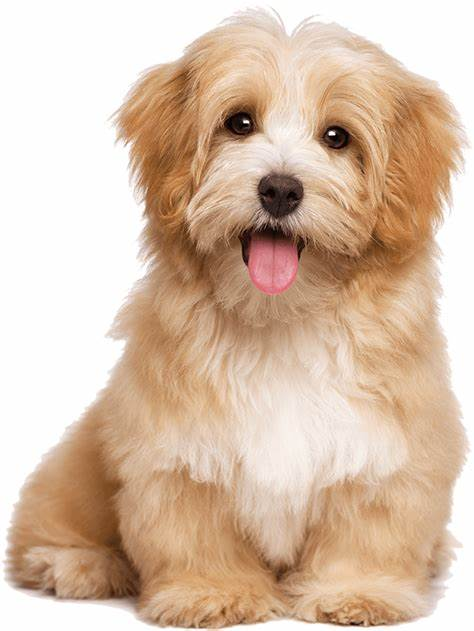

In [5]:
# Load image classification pipeline
classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

# Load and display image
image = Image.open("dog.jpg")  # Replace with your image
image.show()  # Show image in default viewer

# Predict class
results = classifier(image)

# Print classification results
for result in results:
    print(f"Label: {result['label']}, Confidence: {result['score']:.4f}")

image

## Object Detection

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


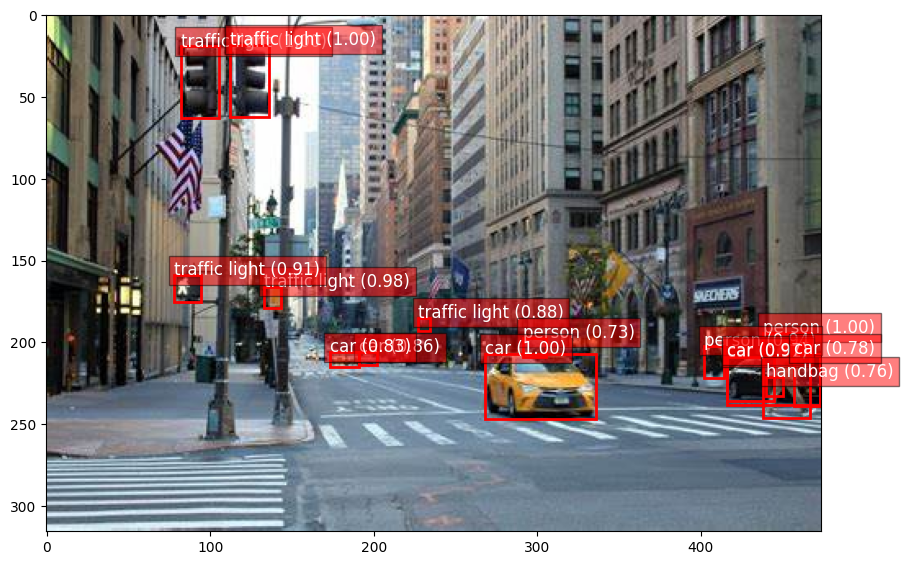

In [4]:
detector = pipeline("object-detection", model="facebook/detr-resnet-50")

image = Image.open("street.jpg")

results = detector(image)

fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(image)

# Draw bounding boxes
for result in results:
    box = result["box"]
    label = result["label"]
    score = result["score"]

    # Only show objects with confidence > 70%
    if score > 0.7:
        x, y, w, h = box["xmin"], box["ymin"], box["xmax"] - box["xmin"], box["ymax"] - box["ymin"]
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="red", facecolor="none")
        ax.add_patch(rect)
        ax.text(x, y, f"{label} ({score:.2f})", color="white", fontsize=12, bbox=dict(facecolor="red", alpha=0.5))

plt.show()

## Image Segmentation

config.json:   0%|          | 0.00/6.88k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Device set to use cpu


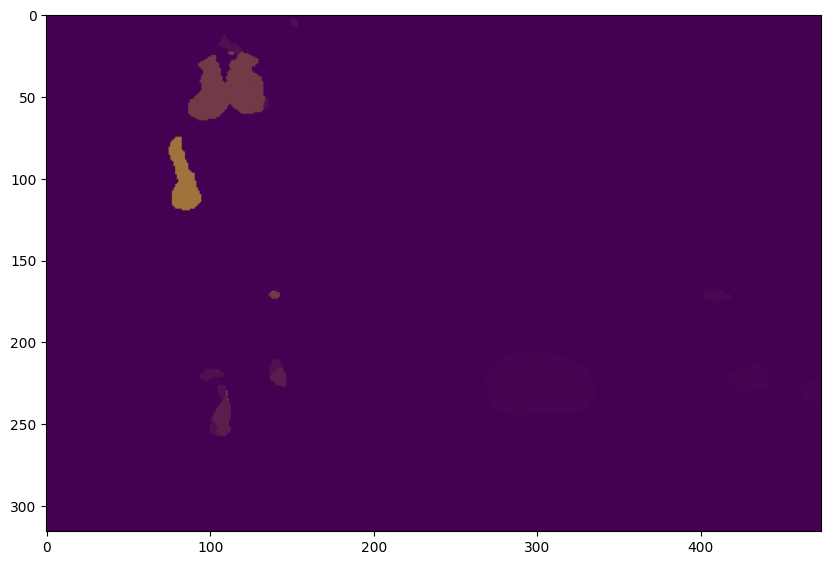

In [6]:
segmenter = pipeline("image-segmentation", model="nvidia/segformer-b0-finetuned-ade-512-512")

image = Image.open("street.jpg")

results = segmenter(image)

fig, ax = plt.subplots(1, figsize=(10, 8))
ax.imshow(image)

for result in results:
    mask = result["mask"]
    ax.imshow(mask, alpha=0.5)

plt.show()

## Text to Image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

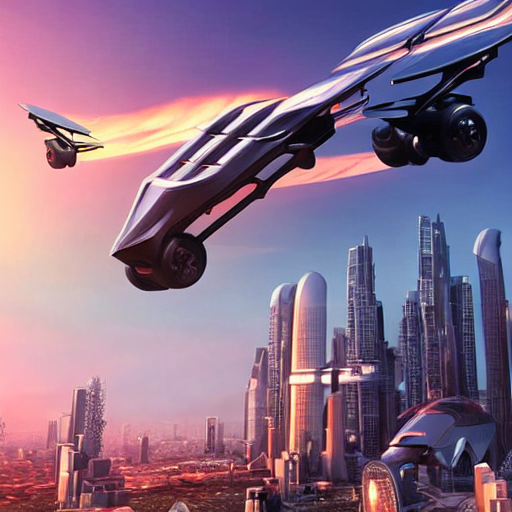

In [6]:
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe.to("cuda")

prompt = "A futuristic city with flying cars at sunset"
image = pipe(prompt).images[0]
image

## Diffusion

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

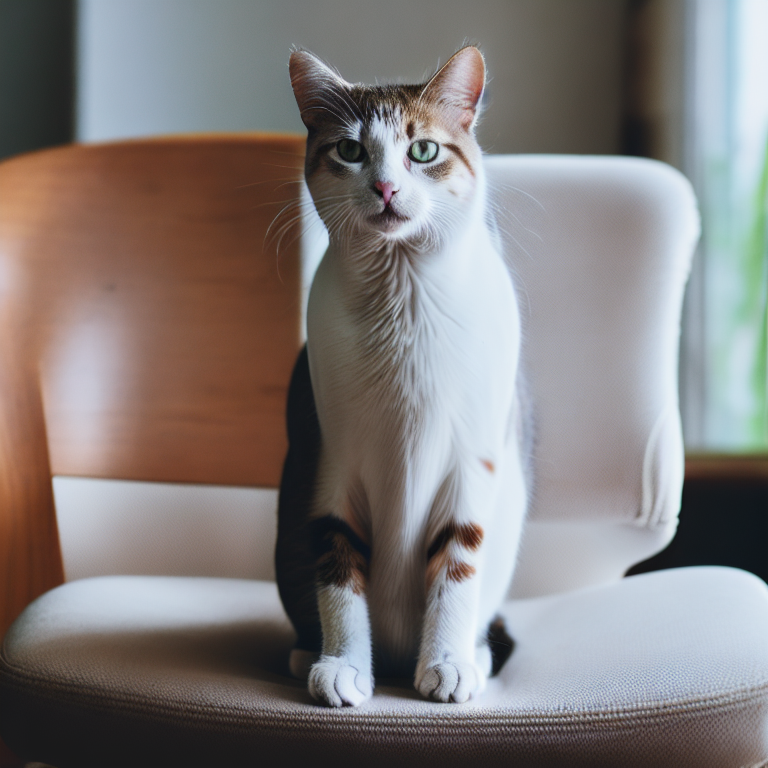

In [5]:
pipe_txt2img = AutoPipelineForText2Image.from_pretrained(
    "dreamlike-art/dreamlike-photoreal-2.0", torch_dtype=torch.float16, use_safetensors=True
).to("cuda")

# Define the prompt and generator
prompt = "cinematic photo of a cat sitting on chair."
generator = torch.Generator(device="cuda").manual_seed(37)

# Generate the image
image = pipe_txt2img(prompt, generator=generator).images[0]
image

# Audio & Speech Processing

## Audio Classification

In [8]:
from transformers import pipeline

pipe = pipeline("audio-classification", model="MIT/ast-finetuned-audioset-10-10-0.4593")
pipe('example.mp3')

config.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.11/dist-packages/transformers/models/audio_spectrogram_transformer/feature_extraction_audio_spectrogram_transformer.py:118: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  waveform = torch.from_numpy(waveform).unsqueeze(0)


[{'score': 0.48486822843551636, 'label': 'Music'},
 {'score': 0.1913105696439743, 'label': 'Violin, fiddle'},
 {'score': 0.08519730716943741, 'label': 'Musical instrument'},
 {'score': 0.04692428931593895, 'label': 'Bowed string instrument'},
 {'score': 0.0453609861433506, 'label': 'Orchestra'}]

## Audio Transcription

In [9]:
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition")
pipe('interview.mp3')

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 22aad52 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

Device set to use cuda:0


{'text': "MOST OF US WOULD BE SURPRISED TO HEAR THAT THE UNIVERSE IS GOING TO END ONE DAY WE EXPECT THE UNIVERSE TO GO ON FOREVER INTO THE FUTURE WHY DO WE HAVE THE IDEA THAT IT DOESN'T GO ON FOREVER INTO THE PAST I NOT SAYING I KNOW THE ANSWER TO THIS THIS IS ONE OF THE DEEPEST QUESTIONS WE DO NOT KNOW THE ANSWER WE SIMPLY HAVE TO KEEP AN OPEN MIND ALL OF US PHILOSOPHERS SCIENCES RELIGIOUS PEOPLE NO ONE IN FACT KNOWS YOU MAKE THE ARGUMENT IN PALE BLUE DOT THAT IT'S TIME TO HIT THE ROAD AGAIN SKYWARD AS IN SPACE TRAVEL EXPLORATION PERHAPS COLONIES FOR THE VERY SALVATION OF THE SPECIES HOW IS THAT WELL FIRST OFFI AS YOU SUGGEST WE WE ARE A WANDERING SPECIES WE COME FROM HUNTER GATHERERS WE ORE NOMADS AND FOR THE MILLION YEARS THAT THE HUMAN FAMILY HAS BEEN AROUND THAT WAS OUR LIFE STYLE THAT MUST BE BUILT INTO US DEEPLY IT'S ONLY THE LAST TEN THOUSAND YEARS THAT WE'VE HAD A SETTLED AND SEDENTARY EXISTENCE AND NOW THE EARTH IS ALL EXPLORED OUR EXPLORATORY INSTINCTS SIR UNFULFILLED AND I 

## Text to Speech

In [6]:
from transformers import pipeline

pipe = pipeline("text-to-speech")
text = "Hello, how are you today?"
output = pipe(text)

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/8.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.68G [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/encodec/modeling_encodec.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.register_buffer("padding_total", torch.tensor(kernel_size - stride, dtype=torch.int64), persistent=False)


generation_config.json:   0%|          | 0.00/4.91k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


In [7]:
from IPython.display import Audio

# Play the loaded audio
Audio(data=output['audio'],rate=output['sampling_rate'])